### Identifying Outliers

Note-  I am detecting outliers using the 'Three Sigma Approach'
if x < U - 3s.d or x > U - 3s.d, then x is an outlier

0: Repeat the steps- *Converting prices to returns*:

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                progress=False)

df=df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [3]:
df['simple_rtn'] = df.adj_close.pct_change()

In [4]:
df.head()

,adj_close,simple_rtn
Date,,
2000-01-03,0.846127,NaN
2000-01-04,0.774790,-0.084310
2000-01-05,0.786128,0.014633
2000-01-06,0.718097,-0.086538
2000-01-07,0.752113,0.047369


1. Calculate the rolling mean and standard deviation:

In [5]:
df_rolling = df[['simple_rtn']].rolling(window=21)\
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

2. Join the rolling metrics to the original data:

In [6]:
df_outliers = df.join(df_rolling)

3.Define a fuction for detecting outliers:

In [7]:
def indentify_outliers(row, n_sigmas=3):
        '''
        Function for identifying the outliers using the 3 sigma rule. 
        The row must contain the following columns/indices: simple_rtn, mean, std.
        
        Parameters
        ----------
        row : pd.Series
        A row of a pd.DataFrame, over which the function can be applied.
        n_sigmas : int
        The number of standard deviations above/below the mean - used for detecting outliers
        
        Returns
        -------
        0/1 : int
        An integer with 1 indicating an outlier and 0 otherwise.
        '''''
        x = row['simple_rtn']
        mu = row['mean']
        sigma = row['std']
        
        if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
            return 1
        else:
            return 0 

4. Identify the outliers and extrct their values for later use:

In [8]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)

outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']] 

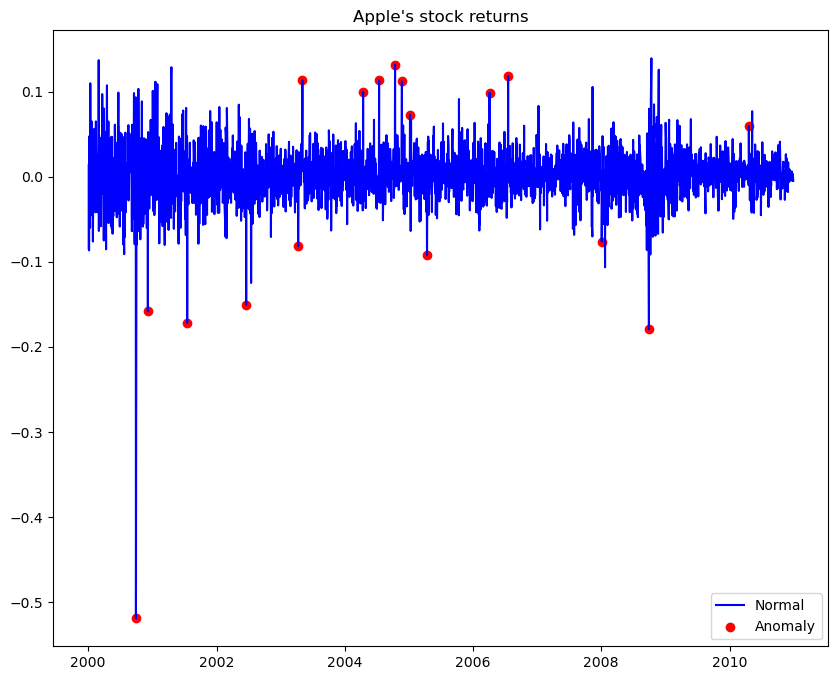

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
       color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
          color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
plt.show()